## Import Libraries

In [1]:
import numpy as np
import math
import cv2   
import matplotlib.image as image
import matplotlib.pyplot as plt
from matplotlib import pyplot

## Mask Generation

In [2]:
def HalfMask(T,sigma):
    sHalf=np.round(math.sqrt(-np.log(T)*2*(np.square(sigma)))) # formula to compute the half mask size
    return sHalf
def calculate_filter_size(T,sigma):
    return 2*HalfMask(T,sigma)+1 # calculating size of filter 

In [3]:
def Generate_Mask(T,sigma,shalf):
     x1=range(- int (shalf),int (shalf)+1) # Setting range for x1
     y1=range(- int (shalf),int (shalf)+1) # Setiing range for y1
     y,x = np.meshgrid (x1,y1) # meshgrid function to generate mask a rectangular grid of 2 one dimesnional arrays
     return x,y

## Sobal Filter

In [4]:
def sobal_x():
    ##Sobel operator kernels.
    x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return x
def sobal_y():
    y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return y
    

## Gaussian Filter

In [5]:
def apply_Gaussain(x,y,sigma):
     z1=((x**2)+(y**2))
     z2= 2*(sigma**2)
     return np.exp(-(z1/z2)) # Gaussian derivative in steps

## GrayScale Conversion

In [6]:
def convert_grayscale(img):
    gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8) # converting image to grayscale
    return gray_img

## ImageSmoothing

In [7]:
def ImageSmoothing(img,mask):
  if (len(img.shape) > 2):
        img=convert_grayscale(img)
  i_h,i_w= img.shape # height and width of image
  m_h,m_w= mask.shape # height and width of mask  
  pad =(m_w-1)//2 # pading the borders of image
  img=cv2.copyMakeBorder(img,pad,pad,pad,pad,cv2.BORDER_REPLICATE)
  outputimg=np.zeros((i_h,i_w)) # set the size of output according to the image
  for y in range(i_h):  # concolving around the image to apply filter/ mask 
        for x in range(i_w):
              outputimg[y,x]=np.sum((mask * img[y:y+m_h, x:x+m_w]))
  return outputimg

## Convolution Function

In [8]:
def apply_mask(img,mask):
  if (len(img.shape) > 2):
        img=convert_grayscale(img)
  i_h,i_w= img.shape # height and width of image
  m_h,m_w= mask.shape # height and width of mask  
  pad =(m_w-1)//2 # pading the borders of image
  img=cv2.copyMakeBorder(img,pad,pad,pad,pad,cv2.BORDER_REPLICATE)
  outputimg=np.zeros((i_h,i_w)) # set the size of output according to the image
  for y in range(i_h):  # concolving around the image to apply filter/ mask 
        for x in range(i_w):
              outputimg[y,x]=np.sum((mask * img[y:y+m_h, x:x+m_w]))
  return outputimg

## Haris Response 

In [9]:
def Harris(k,Ixx,Iyy,IxIy):
    DetM = (Ixx * Iyy) - (IxIy**2)# Haris response calculation Finding determinant of M
    TraceM = Ixx + Iyy # Finding TraceM by adding both lambdas
    return DetM - k*(TraceM**2) # 

## Haris Response with Non-Maximum-Supression

In [10]:
def Harris_with_NonMaxSupression(img,im,threshold,haris):
    h,w=img.shape
    img_corners = np.copy(im) # set output image same as image dimesnion
    for row in range(h): # loop over Hais response
        for col in range(w):
                if haris[row][col] > threshold: # finding the haris maximum than threshold 
                    # this is a corner
                    img_corners[row, col] =[255,0,0]# Make corners red
    return img_corners

## Reading Images

In [11]:
circle=cv2.imread("circle.jpg")
xray=cv2.imread("xray.tif")
ctscan=cv2.imread("ctscan.tif")
mecca=cv2.imread("mecca06.jpg")
shape=cv2.imread("shapessm.jpg")
wallLahore=cv2.imread("wallLahoreFortBBC .jpg")
chess=cv2.imread("chess.jpg")
shapes=cv2.imread("shapes.png")

## Main Function

In [12]:
def HarrisCornerDetector(img,T,sigma,k,threshold):
      sHalf=HalfMask(T,sigma)
      fiter_size=calculate_filter_size(T,sigma) # Function to specify the filter size
      X,Y=Generate_Mask(T,sigma,sHalf)# Generating X and Y mask
      Gauss=apply_Gaussain(X,Y,sigma) # Gausian filter for Smoothing
      fig, ax = plt.subplots(4,3,figsize=(20,20)) # function to plot subplots
      g_img=convert_grayscale(img) # First converting the image to grayscale if has three chanels
      ax[0,0].imshow(img)
      ax[0,0].set_title("original Image") # Plot of Original Image
      smooth_img=ImageSmoothing(g_img,Gauss) # Function apply smoothing using Gaussian filter
      ax[0,1].imshow(-smooth_img,cmap='gray')
      ax[0,1].set_title("Image after Smoothing") # Plot of Smooth image
      sobalx=sobal_x()# Sobal filter w.r.t to x
      sobaly=sobal_y() # Sobal filter w.r.t to y
      Ix=apply_mask(g_img,sobalx) # Convolve image over sobalx filter
      ax[0,2].imshow(Ix,cmap='gray') # plot of Ix
      ax[0,2].set_title('Ix')
      Iy=apply_mask(g_img,sobaly)# Convolve Image over sobaly filter
      ax[1,0].imshow(Iy,cmap='gray')  # plot of Iy
      ax[1,0].set_title('Iy')
      Iyy=np.square(Iy) # taking square of derivatives
      Ixx=np.square(Ix) # taking square of derivatives
      IxIy=Ix*Iy # computing Ixiy by multiplying Ix and Iy
      ax[1,1].imshow(IxIy,cmap='gray')
      ax[1,1].set_title('IxIy') #plot of IxIy
      ax[1,2].imshow(Ixx,cmap='gray') 
      ax[1,2].set_title('Ixx') # plot of Ixx
      ax[2,0].imshow(Iyy,cmap='gray')  
      ax[2,0].set_title('Iyy') # plot of Iyy
      gIxx=apply_mask(Ixx,Gauss) 
      ax[2,1].imshow(gIxx,cmap='gray') # plot of g(Ixx) 
      ax[2,1].set_title('g(Ixx)') # Applying Gaussian on Ixx
      gIyy=apply_mask(Iyy,Gauss) # Applying Gaussian on Iyy
      ax[2,2].imshow(gIyy,cmap='gray') # plot of g(iyy)
      ax[2,2].set_title('g(Iyy)')
      gIxIy=apply_mask(IxIy,Gauss) # Applying Gaussian on IxIy
      ax[3,0].imshow(gIxIy,cmap='gray') # plot of IxIy
      ax[3,0].set_title('g(IxIy)')
      har=Harris(k,gIxx,gIyy,gIxIy) # Computing Haris response by giving values of gIxx,gIyy,gIxIy and k
      img_corners=Harris_with_NonMaxSupression(g_img,img,threshold,har) # Applying non-maximum-suppression
      ax[3,1].imshow(har,cmap='gray') # plot of Harris Response
      ax[3,1].set_title('Harris Response')
      ax[3,2].imshow(img_corners,cmap='gray')
      ax[3,2].set_title('Harris Response with Non-Maximum-Supression')  #plot of Harris Response with Non-Maximum-Supression

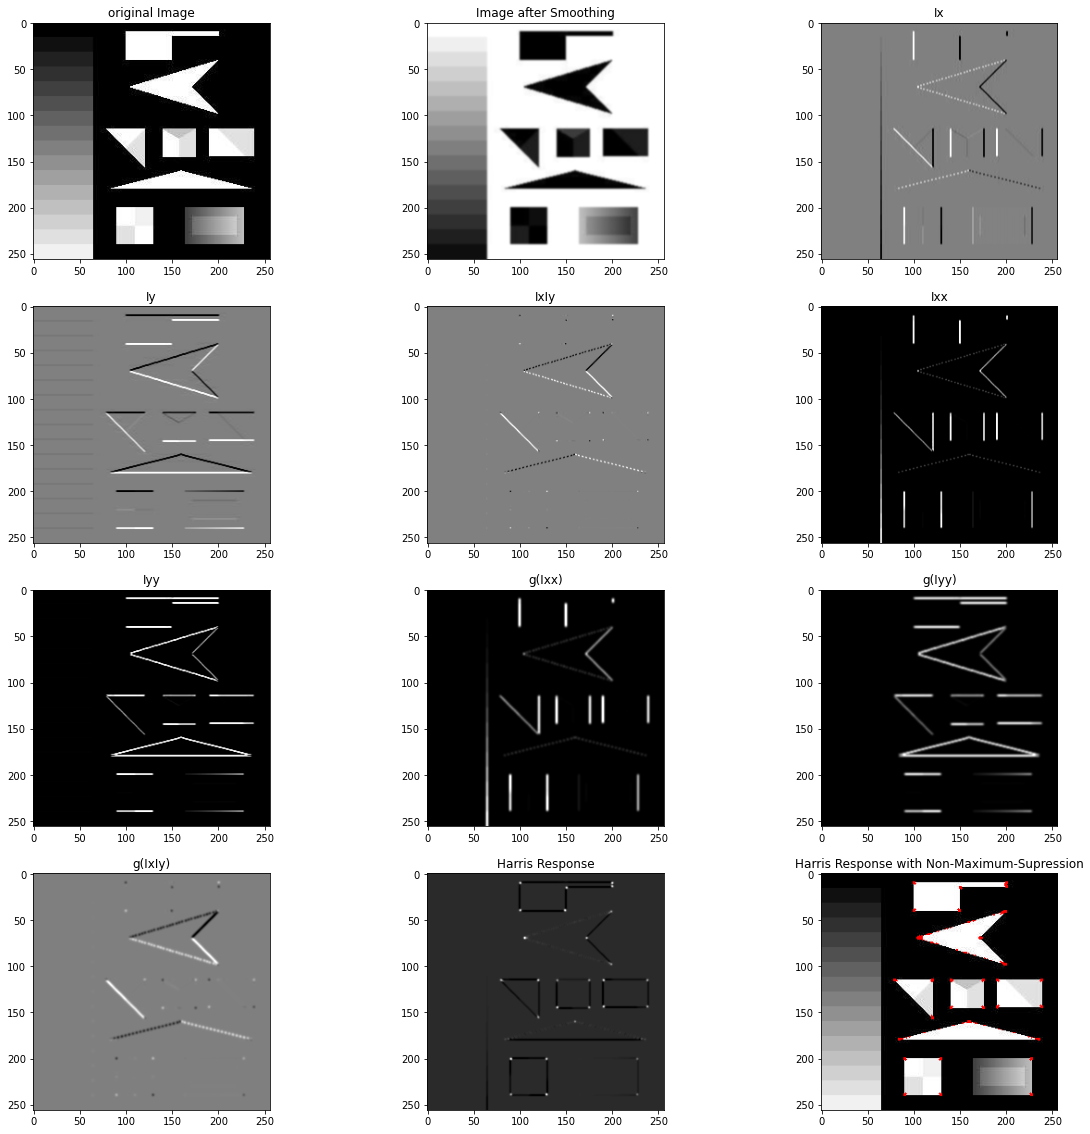

In [13]:
HarrisCornerDetector(shapes, 0.3,1,0.04,100000000000.00)